# 📱 App-Markt Analyse
## Welche Plattform ist attraktiver für App-Entwickler?
**Ziel:** Eine datengetriebene Story mit handlungsrelevantem Outcome
---

## 🔧 Setup & Infrastruktur
- **Datenquellen**: Kaggle CSVs (Google Play, App Store)
- **Speicherung**: MongoDB (NoSQL)
- **Verarbeitung**: Pandas + MapReduce
- **Visualisierung**: Matplotlib / Seaborn
- **Teamarbeit** & Git


# 0️⃣ Datenverarbeitung



## Imports und MongoDB-Verbindung

Zuerst installieren wir erforderliche Bibliotheken und stellen die Verbindung zur MongoDB her.

In [1]:
# Installiere erforderliche Bibliotheken (falls nicht vorhanden)
# !pip install pandas pymongo matplotlib wordcloud

from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

# MongoDB-Verbindung
client = MongoClient("mongodb://localhost:27017/")
db = client['app_market']
raw_coll = db['raw_apps']
clean_coll = db['clean_apps']
mr_coll = db['mr_genre_avg_rating']
print("MongoDB-Verbindung hergestellt.")

MongoDB-Verbindung hergestellt.


## 1. Einlesen des Apple App Store Datensatzes

In [2]:
# Einlesen des CSV in ein DataFrame
apple_df = pd.read_csv('datasource/appleAppData.csv')

# Schema anzeigen und erste Zeilen
print("Apple App Store DataFrame Schema:")
print(apple_df.dtypes)
apple_df.head()

Apple App Store DataFrame Schema:
App_Id                      object
App_Name                    object
AppStore_Url                object
Primary_Genre               object
Content_Rating              object
Size_Bytes                 float64
Required_IOS_Version        object
Released                    object
Updated                     object
Version                     object
Price                      float64
Currency                    object
Free                          bool
DeveloperId                  int64
Developer                   object
Developer_Url               object
Developer_Website           object
Average_User_Rating        float64
Reviews                      int64
Current_Version_Score      float64
Current_Version_Reviews      int64
dtype: object


,App_Id,App_Name,AppStore_Url,Primary_Genre,Content_Rating,Size_Bytes,Required_IOS_Version,Released,Updated,Version,...,Currency,Free,DeveloperId,Developer,Developer_Url,Developer_Website,Average_User_Rating,Reviews,Current_Version_Score,Current_Version_Reviews
0,com.hkbu.arc.apaper,A+ Paper Guide,https://apps.apple.com/us/app/a-paper-guide/id...,Education,4+,21993472.0,8.0,2017-09-28T03:02:41Z,2018-12-21T21:30:36Z,1.1.2,...,USD,True,1375410542,HKBU ARC,https://apps.apple.com/us/developer/hkbu-arc/i...,NaN,0.0,0,0.0,0
1,com.dmitriev.abooks,A-Books,https://apps.apple.com/us/app/a-books/id103157...,Book,4+,13135872.0,10.0,2015-08-31T19:31:32Z,2019-07-23T20:31:09Z,1.3,...,USD,True,1031572001,Roman Dmitriev,https://apps.apple.com/us/developer/roman-dmit...,NaN,5.0,1,5.0,1
2,no.terp.abooks,A-books,https://apps.apple.com/us/app/a-books/id145702...,Book,4+,21943296.0,9.0,2021-04-14T07:00:00Z,2021-05-30T21:08:54Z,1.3.1,...,USD,True,1457024163,Terp AS,https://apps.apple.com/us/developer/terp-as/id...,NaN,0.0,0,0.0,0
3,fr.antoinettefleur.Book1,A-F Book #1,https://apps.apple.com/us/app/a-f-book-1/id500...,Book,4+,81851392.0,8.0,2012-02-10T03:40:07Z,2019-10-29T12:40:37Z,1.2,...,USD,False,439568839,i-editeur.com,https://apps.apple.com/us/developer/i-editeur-...,NaN,0.0,0,0.0,0
4,com.imonstersoft.azdictionaryios,A-Z Synonyms Dictionary,https://apps.apple.com/us/app/a-z-synonyms-dic...,Reference,4+,64692224.0,9.0,2020-12-16T08:00:00Z,2020-12-18T21:36:11Z,1.0.1,...,USD,True,656731821,Ngov chiheang,https://apps.apple.com/us/developer/ngov-chihe...,http://imonstersoft.com,0.0,0,0.0,0


## 2. Einlesen des Google Play Store Datensatzes

In [3]:
# Einlesen des CSV in ein DataFrame
google_df = pd.read_csv('datasource/Google-Playstore.csv')

# Schema anzeigen und erste Zeilen
print("Google Play Store DataFrame Schema:")
print(google_df.dtypes)
google_df.head()

Google Play Store DataFrame Schema:
App Name              object
App Id                object
Category              object
Rating               float64
Rating Count         float64
Installs              object
Minimum Installs     float64
Maximum Installs       int64
Free                    bool
Price                float64
Currency              object
Size                  object
Minimum Android       object
Developer Id          object
Developer Website     object
Developer Email       object
Released              object
Last Updated          object
Content Rating        object
Privacy Policy        object
Ad Supported            bool
In App Purchases        bool
Editors Choice          bool
Scraped Time          object
dtype: object


,App Name,App Id,Category,Rating,Rating Count,Installs,Minimum Installs,Maximum Installs,Free,Price,...,Developer Website,Developer Email,Released,Last Updated,Content Rating,Privacy Policy,Ad Supported,In App Purchases,Editors Choice,Scraped Time
0,Gakondo,com.ishakwe.gakondo,Adventure,0.0,0.0,10+,10.0,15,True,0.0,...,https://beniyizibyose.tk/#/,jean21101999@gmail.com,"Feb 26, 2020","Feb 26, 2020",Everyone,https://beniyizibyose.tk/projects/,False,False,False,2021-06-15 20:19:35
1,Ampere Battery Info,com.webserveis.batteryinfo,Tools,4.4,64.0,"5,000+",5000.0,7662,True,0.0,...,https://webserveis.netlify.app/,webserveis@gmail.com,"May 21, 2020","May 06, 2021",Everyone,https://dev4phones.wordpress.com/licencia-de-uso/,True,False,False,2021-06-15 20:19:35
2,Vibook,com.doantiepvien.crm,Productivity,0.0,0.0,50+,50.0,58,True,0.0,...,NaN,vnacrewit@gmail.com,"Aug 9, 2019","Aug 19, 2019",Everyone,https://www.vietnamairlines.com/vn/en/terms-an...,False,False,False,2021-06-15 20:19:35
3,Smart City Trichy Public Service Vehicles 17UC...,cst.stJoseph.ug17ucs548,Communication,5.0,5.0,10+,10.0,19,True,0.0,...,http://www.climatesmarttech.com/,climatesmarttech2@gmail.com,"Sep 10, 2018","Oct 13, 2018",Everyone,NaN,True,False,False,2021-06-15 20:19:35
4,GROW.me,com.horodyski.grower,Tools,0.0,0.0,100+,100.0,478,True,0.0,...,http://www.horodyski.com.pl,rmilekhorodyski@gmail.com,"Feb 21, 2020","Nov 12, 2018",Everyone,http://www.horodyski.com.pl,False,False,False,2021-06-15 20:19:35


## 3. Speicherung der Rohdaten in MongoDB

In [4]:
# Rohdaten in MongoDB einfügen
raw_coll.delete_many({})  # bestehende Rohdaten löschen, falls vorhanden
raw_coll.insert_many(apple_df.to_dict('records'))
raw_coll.insert_many(google_df.to_dict('records'))
print(f'Rohdaten: {raw_coll.count_documents({})} Dokumente in raw_apps.')

Rohdaten: 3543320 Dokumente in raw_apps.


## 4. Datenverarbeitung

In [5]:
# === 1. Kopieren, Plattform kennzeichnen und Spalten umbenennen ===
apple_df_clean = apple_df.copy()
google_df_clean = google_df.copy()
apple_df_clean['platform'] = 'iOS'
google_df_clean['platform'] = 'Android'

apple_df_clean.rename(columns={
    'App_Name': 'app_name',
    'Primary_Genre': 'category',
    'Average_User_Rating': 'rating',
    'Reviews': 'num_reviews',
    'Price': 'price',
    'Free': 'free',
    'Released': 'released',
    'Updated': 'updated'
}, inplace=True)

google_df_clean.rename(columns={
    'App Name': 'app_name',
    'Category': 'category',
    'Rating': 'rating',
    'Rating Count': 'num_reviews',
    'Price': 'price',
    'Free': 'free',
    'Released': 'released',
    'Last Updated': 'updated'
}, inplace=True)

# === 2. Datetime konvertieren ===
apple_df_clean['released'] = pd.to_datetime(apple_df_clean['released'])
apple_df_clean['updated']  = pd.to_datetime(apple_df_clean['updated'])
google_df_clean['released'] = pd.to_datetime(google_df_clean['released'])
google_df_clean['updated']  = pd.to_datetime(google_df_clean['updated'])

# === 3. Relevante Spalten auswählen und mergen ===
cols = ['app_name', 'category', 'rating', 'num_reviews', 'price', 'free',
        'platform', 'released', 'updated']
apple_sub  = apple_df_clean[cols]
google_sub = google_df_clean[cols]

combined_df = pd.concat([apple_sub, google_sub], ignore_index=True)
combined_df.drop_duplicates(subset=['app_name', 'platform'], inplace=True)

# === 4. Sampling: 50% der Datensätze, Top 100 Review-Apps immer dabei ===
total = len(combined_df)
target = total // 2

# Top 100 Apps nach num_reviews (plattform‑übergreifend)
top100 = combined_df.nlargest(100, 'num_reviews')

# Restliche Zeilen ohne die Top100
rest = combined_df.drop(top100.index)

# Zufallsstichprobe aus „rest“, um insgesamt target Zeilen zu bekommen
rest_sample = rest.sample(n=target - len(top100), random_state=42)

# Finaler Datensatz
sampled_df = pd.concat([top100, rest_sample], ignore_index=True)
print(f"Verwendete Datensätze: {len(sampled_df)} von {total} ({len(sampled_df)/total:.0%})")

# === 5. Konvertierungs-Helper & Insert in MongoDB ===
def to_native(val):
    if isinstance(val, np.integer):
        return int(val)
    if isinstance(val, np.floating):
        return float(val)
    if pd.api.types.is_datetime64_any_dtype(type(val)):
        return pd.to_datetime(val).to_pydatetime()
    return val

# NaN → None
df_native = sampled_df.where(pd.notnull(sampled_df), None)

# Records auf native Typen konvertieren
records = [
    {k: to_native(v) for k, v in rec.items()}
    for rec in df_native.to_dict('records')
]

Verwendete Datensätze: 1700727 von 3401455 (50%)


,app_name,category,rating,num_reviews,price,free,platform,released,updated
0,WhatsApp Messenger,Communication,4.0,138557570.0,0.0,True,Android,2010-10-18 00:00:00,2021-06-09 00:00:00
1,Instagram,Social,3.8,120206190.0,0.0,True,Android,2012-04-03 00:00:00,2021-06-14 00:00:00
2,Facebook,Social,2.3,117850066.0,0.0,True,Android,NaT,2021-06-16 00:00:00
3,YouTube,Video Players & Editors,4.4,112440547.0,0.0,True,Android,2010-10-20 00:00:00,2021-06-16 00:00:00
4,Garena Free Fire - Rampage,Action,4.2,89177097.0,0.0,True,Android,2017-12-07 00:00:00,2021-06-04 00:00:00


In [7]:
sampled_df.head(10)

,app_name,category,rating,num_reviews,price,free,platform,released,updated
0,WhatsApp Messenger,Communication,4.0,138557570.0,0.0,True,Android,2010-10-18 00:00:00,2021-06-09 00:00:00
1,Instagram,Social,3.8,120206190.0,0.0,True,Android,2012-04-03 00:00:00,2021-06-14 00:00:00
2,Facebook,Social,2.3,117850066.0,0.0,True,Android,NaT,2021-06-16 00:00:00
3,YouTube,Video Players & Editors,4.4,112440547.0,0.0,True,Android,2010-10-20 00:00:00,2021-06-16 00:00:00
4,Garena Free Fire - Rampage,Action,4.2,89177097.0,0.0,True,Android,2017-12-07 00:00:00,2021-06-04 00:00:00
5,Messenger – Text and Video Chat for Free,Communication,4.0,78563229.0,0.0,True,Android,2014-01-30 00:00:00,2021-06-14 00:00:00
6,Clash of Clans,Strategy,4.5,56025424.0,0.0,True,Android,2013-09-30 00:00:00,2021-06-09 00:00:00
7,PUBG MOBILE - Traverse,Action,4.3,37479011.0,0.0,True,Android,2018-03-19 00:00:00,2021-05-10 00:00:00
8,TikTok,Social,4.4,36446381.0,0.0,True,Android,2015-07-09 00:00:00,2021-06-15 00:00:00
9,Google Photos,Photography,4.5,35369236.0,0.0,True,Android,2015-05-28 00:00:00,2021-06-14 00:00:00


## Speicherung in die MongoDB

In [ ]:
# Speicherung in die MongoDB
clean_coll.delete_many({})
clean_coll.insert_many(records)
print(f"In MongoDB gespeichert: {clean_coll.count_documents({})} Dokumente")

# 1️⃣ Marktübersicht
**Fragestellungen:**
- Wie viele Apps gibt es pro Plattform?
- Welche Kategorien sind wie stark vertreten?
- Wo ist der Wettbewerb höher oder geringer?

**Mögliche Diagramme:**
- Balkendiagramm App-Anzahl je Plattform
- Verteilung nach Genre/Kategorie

## Vorbereitung

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setz den Stil für die Diagramme
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## Anzahl der Apps pro Plattform

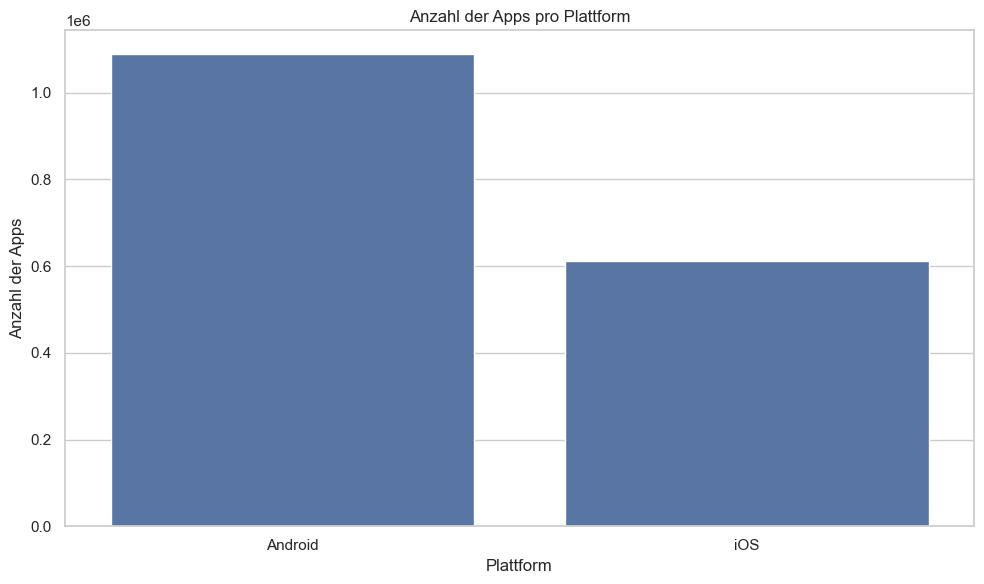

In [13]:
# === Anzahl der Apps pro Plattform ===
platform_counts = sampled_df['platform'].value_counts()

plt.figure()
sns.barplot(x=platform_counts.index, y=platform_counts.values)
plt.title('Anzahl der Apps pro Plattform')
plt.xlabel('Plattform')
plt.ylabel('Anzahl der Apps')
plt.tight_layout()
plt.show()

### Analyse

## Verteilung der Kategorien pro Plattform

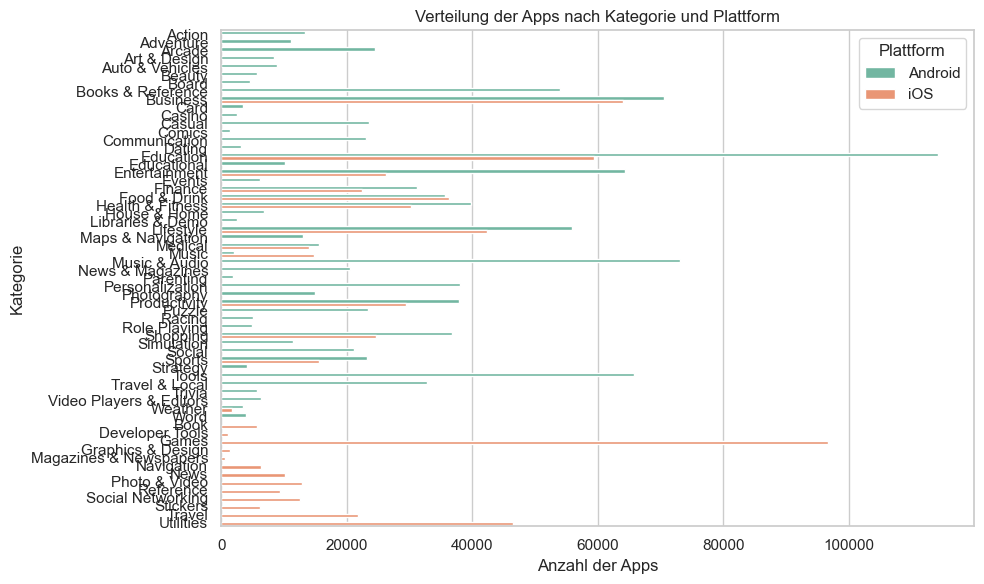

In [14]:
# === Verteilung der Kategorien pro Plattform ===
category_counts = sampled_df.groupby(['platform', 'category']).size().reset_index(name='count')

plt.figure()
sns.barplot(
    data=category_counts,
    x='count', y='category', hue='platform',
    dodge=True, palette='Set2'
)
plt.title('Verteilung der Apps nach Kategorie und Plattform')
plt.xlabel('Anzahl der Apps')
plt.ylabel('Kategorie')
plt.legend(title='Plattform')
plt.tight_layout()
plt.show()

### Analyse


## Wettbewerb pro Kategorie (gesamt)

/var/folders/gt/2q1t88w95z77rlrh16c5y6300000gn/T/ipykernel_69757/295808477.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_total, y='category', x='count', palette='muted')


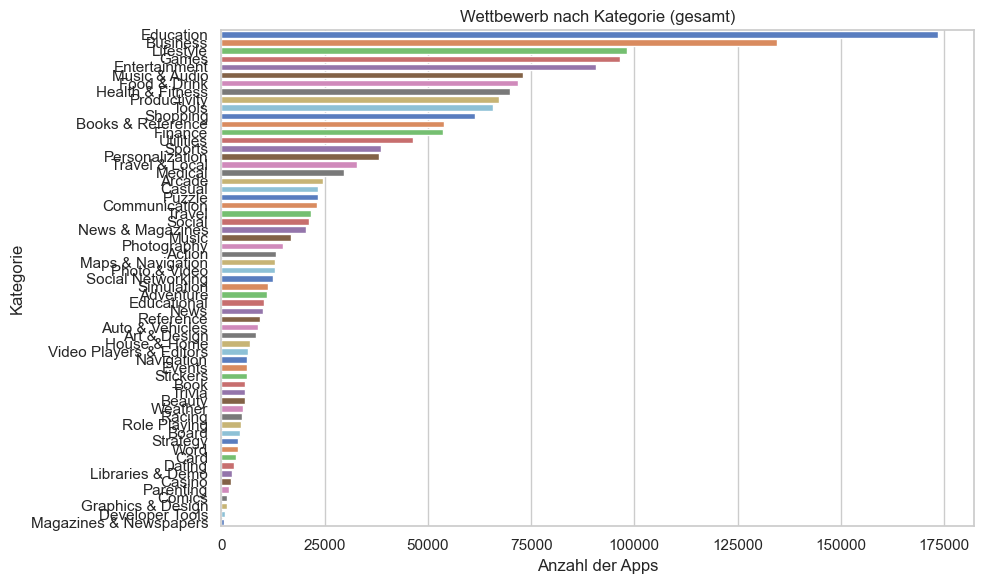

In [17]:
# === Wettbewerb pro Kategorie (gesamt) ===
category_total = sampled_df['category'].value_counts().reset_index()
category_total.columns = ['category', 'count']

plt.figure()
sns.barplot(data=category_total, y='category', x='count', palette='muted')
plt.title('Wettbewerb nach Kategorie (gesamt)')
plt.xlabel('Anzahl der Apps')
plt.ylabel('Kategorie')
plt.tight_layout()
plt.show()

### Analyse

# 2️⃣ Qualität & Nutzerzufriedenheit
**Fragestellungen:**
- Welche Plattform hat die besseren Bewertungen?
- In welchen Genres sind diese besonders gut oder schlecht?
- Wie stark ist die Streuung der Bewertungen?

**Mögliche Visualisierungen:**
- Boxplots
- Vergleich: Bewertung vs. Anzahl Reviews

## Vergleich: Durchschnittsbewertung pro Plattform

/var/folders/gt/2q1t88w95z77rlrh16c5y6300000gn/T/ipykernel_69757/1067792177.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_rating_per_platform.index, y=avg_rating_per_platform.values, palette='coolwarm')


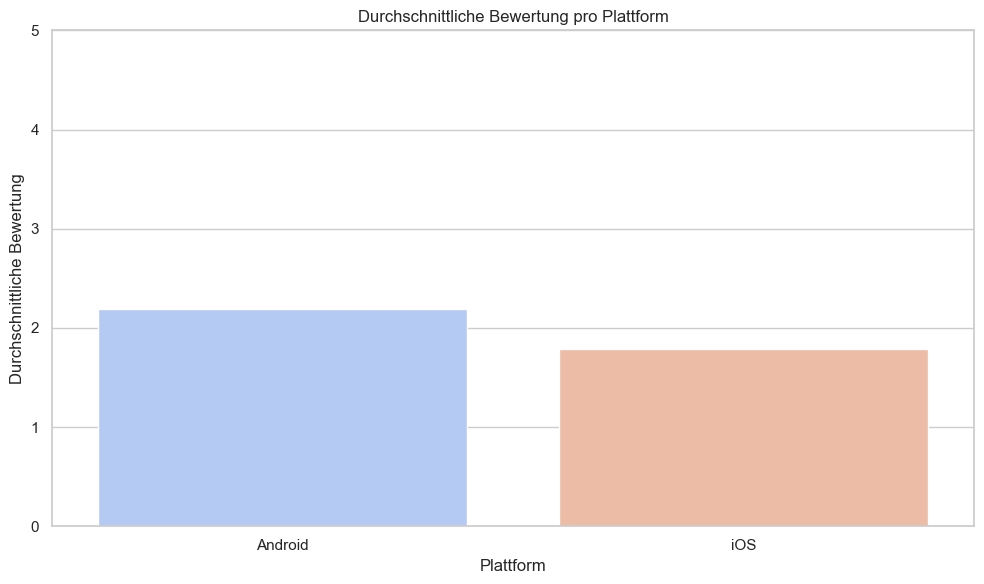

In [18]:
# === Vergleich: Durchschnittsbewertung pro Plattform ===
avg_rating_per_platform = sampled_df.groupby('platform')['rating'].mean()

plt.figure()
sns.barplot(x=avg_rating_per_platform.index, y=avg_rating_per_platform.values, palette='coolwarm')
plt.title('Durchschnittliche Bewertung pro Plattform')
plt.ylabel('Durchschnittliche Bewertung')
plt.xlabel('Plattform')
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

### Analyse

## Bewertungs-Streuung je Plattform

/var/folders/gt/2q1t88w95z77rlrh16c5y6300000gn/T/ipykernel_69757/3427224280.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sampled_df, x='platform', y='rating', palette='coolwarm')


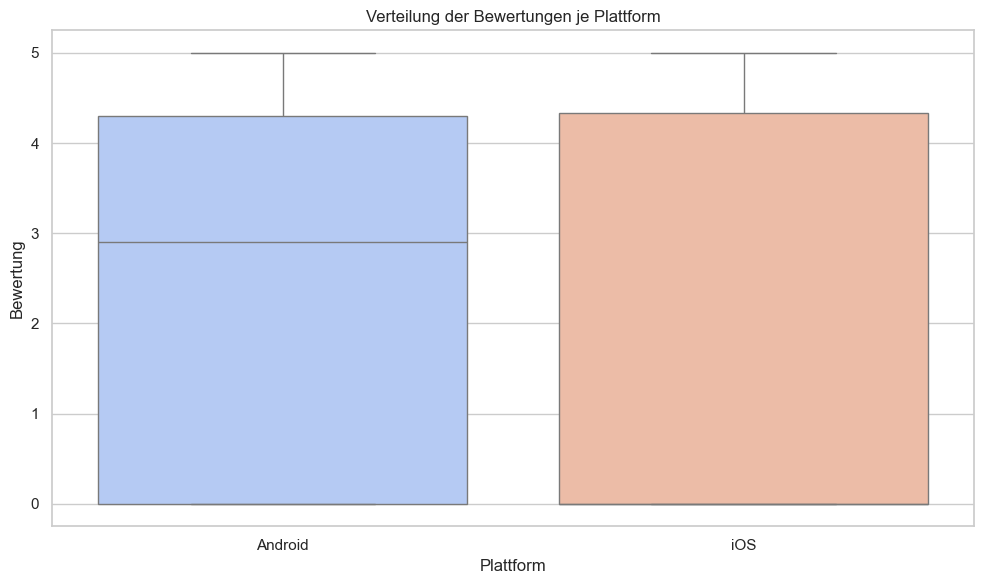

In [20]:
# === Boxplot: Bewertungs-Streuung je Plattform ===
plt.figure()
sns.boxplot(data=sampled_df, x='platform', y='rating', palette='coolwarm')
plt.title('Verteilung der Bewertungen je Plattform')
plt.ylabel('Bewertung')
plt.xlabel('Plattform')
plt.tight_layout()
plt.show()

### Analyse

## Bewertung nach Genre + Plattform

In [ ]:
# === Bewertung nach Genre + Plattform (Boxplot) ===
plt.figure(figsize=(12, 8))
top_genres = sampled_df['category'].value_counts().nlargest(10).index
genre_subset = sampled_df[sampled_df['category'].isin(top_genres)]

sns.boxplot(data=genre_subset, x='rating', y='category', hue='platform', palette='Set3')
plt.title('Bewertungsverteilung in Top-Genres je Plattform')
plt.xlabel('Bewertung')
plt.ylabel('Kategorie')
plt.legend(title='Plattform')
plt.tight_layout()
plt.show()

### Analyse


## Bewertung vs. Anzahl der Reviews

In [ ]:
# === Scatterplot: Bewertung vs. Anzahl der Reviews ===
plt.figure(figsize=(10, 6))
sns.scatterplot(data=sampled_df, x='num_reviews', y='rating', hue='platform', alpha=0.6)
plt.xscale('log')
plt.title('Bewertung vs. Anzahl der Reviews (log-Skala)')
plt.xlabel('Anzahl der Reviews (log)')
plt.ylabel('Bewertung')
plt.legend(title='Plattform')
plt.tight_layout()
plt.show()

### Analyse


# 3️⃣ Monetarisierungschancen
**Fragestellungen:**
- Wie hoch ist der Anteil kostenpflichtiger Apps?
- Wie sehen die Preisverteilungen aus?
- Wo kommen In-App-Käufe häufiger vor?

**Mögliche Visualisierungen:**
- Histogramm Preisverteilung
- Verhältnis kostenlos/kostenpflichtig je Plattform

## Verhältnis kostenlos vs. kostenpflichtig je Plattform

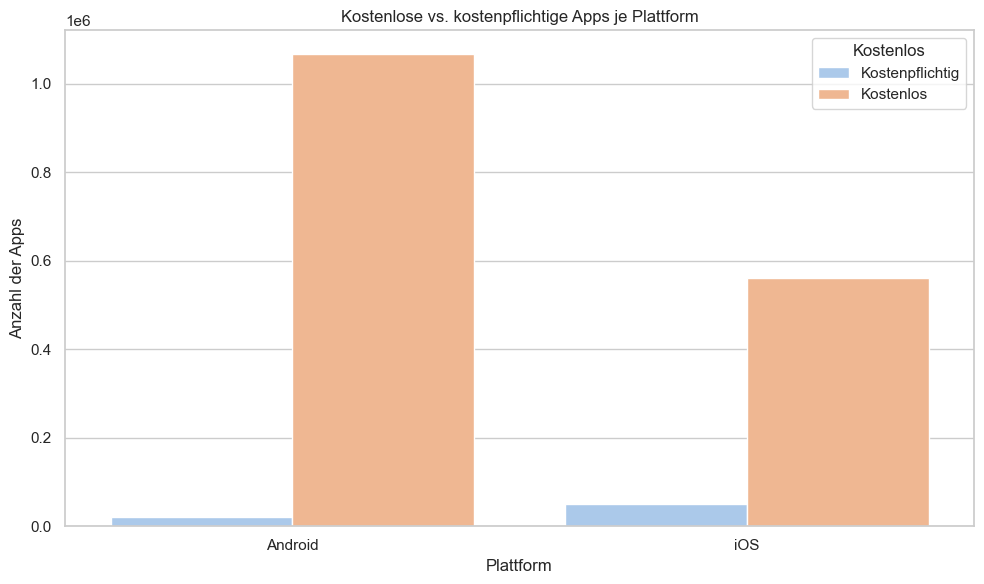

In [21]:
# === Verhältnis kostenlos vs. kostenpflichtig je Plattform ===
plt.figure()
sns.countplot(data=sampled_df, x='platform', hue='free', palette='pastel')
plt.title('Kostenlose vs. kostenpflichtige Apps je Plattform')
plt.xlabel('Plattform')
plt.ylabel('Anzahl der Apps')
plt.legend(title='Kostenlos', labels=['Kostenpflichtig', 'Kostenlos'])
plt.tight_layout()
plt.show()

### Analyse

## Prozentualer Anteil kostenloser Apps pro Plattform

<Figure size 1000x600 with 0 Axes>

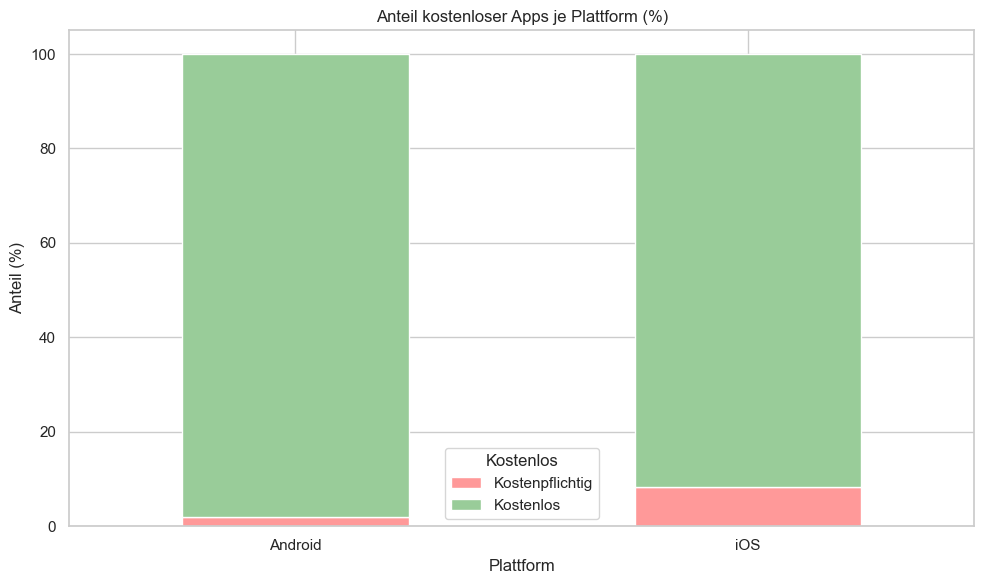

In [22]:
# === Prozentualer Anteil kostenloser Apps pro Plattform ===
free_share = sampled_df.groupby('platform')['free'].value_counts(normalize=True).unstack()
free_share = free_share * 100  # in Prozent

plt.figure()
free_share.plot(kind='bar', stacked=True, color=['#FF9999', '#99CC99'])
plt.title('Anteil kostenloser Apps je Plattform (%)')
plt.ylabel('Anteil (%)')
plt.xlabel('Plattform')
plt.xticks(rotation=0)
plt.legend(title='Kostenlos', labels=['Kostenpflichtig', 'Kostenlos'])
plt.tight_layout()
plt.show()

### Analyse

## Histogramm der Preisverteilung

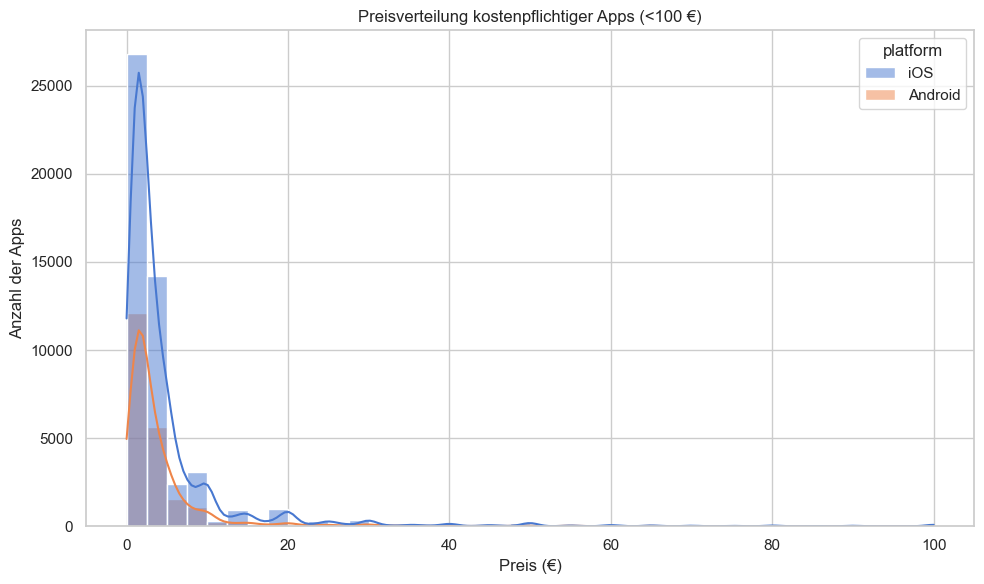

In [23]:
# === Histogramm der Preisverteilung (kostenpflichtige Apps) ===
paid_apps = sampled_df[sampled_df['free'] == False]
paid_apps = paid_apps[paid_apps['price'] < 100]  # Preise über 100€ ausklammern (Ausreißer)

plt.figure()
sns.histplot(data=paid_apps, x='price', bins=40, kde=True, hue='platform', palette='muted')
plt.title('Preisverteilung kostenpflichtiger Apps (<100 €)')
plt.xlabel('Preis (€)')
plt.ylabel('Anzahl der Apps')
plt.tight_layout()
plt.show()

### Analyse

# 5️⃣ Fazit & Handlungsempfehlung
**Zusammenfassung:**
- Plattform-Vergleichstabelle
- Geschäftsempfehlungen je App-Typ:
  - iOS: Bessere Monetarisierung im Bildungs-/Lifestylebereich
  - Android: Größere Vielfalt, niedrigere Eintrittsbarrieren

## 📌 Zielgruppen & Nutzen
| Zielgruppe | Nutzen |
|------------|--------|
| Entwickler:innen | Wo zuerst launchen |
| Startups & Investoren | Geschäftsmodell-Entscheidungen |
| App-Marketing | Plattform-Performance nach Preismodell |
| Lehrende | Plattformpolitik & Verhalten verstehen |